# Problem statement : “How can we improve SAT participation rates ”

## Import data & Function

In [3]:
#Importing dynamic trio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plt.switch_backend('agg') #Run to fix the graph exporting issue

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
#plt.switch_backend('agg')

In [6]:
# Read the data files into DataFrames
sat2019= pd.read_csv("data/sat_2019.csv")
sat2018= pd.read_csv("data/sat_2018.csv")
sat2017= pd.read_csv("data/sat_2017.csv")

In [7]:
sat2017.columns #Check sat2017 col.

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [8]:
sat2018.columns #Check sat2018 col.

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [9]:
sat2019.columns #Check sat2019 col.

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')





## Exploring, cleansing, rename, add col.

In [11]:
# Rename columns 
# ['Participation'] to ['Participation_Rate']
# ['Evidence-Based Reading and Writing'] to ['EBRW']

sat2018 = sat2018.rename(columns={'Participation': 'Participation_Rate', 'Evidence-Based Reading and Writing': 'EBRW'})
sat2017 = sat2017.rename(columns={'Participation': 'Participation_Rate', 'Evidence-Based Reading and Writing': 'EBRW'})
sat2019 = sat2019.rename(columns={'Participation Rate': 'Participation_Rate',})

In [12]:
sat2018.info() # Randomly check the work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Participation_Rate  51 non-null     object
 2   EBRW                51 non-null     int64 
 3   Math                51 non-null     int64 
 4   Total               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [13]:
# Add a 'Year' column to each DataFrame
sat2017['Year'] = 2017
sat2018['Year'] = 2018
sat2019['Year'] = 2019

#Combine all DataFrames into one
combined = pd.concat([sat2017, sat2018, sat2019], ignore_index=True)

# Print the combined DataFrame --> to check the combined file
combined.head(5)

,State,Participation_Rate,EBRW,Math,Total,Year
0,Alabama,5%,593,572,1165,2017
1,Alaska,38%,547,533,1080,2017
2,Arizona,30%,563,553,1116,2017
3,Arkansas,3%,614,594,1208,2017
4,California,53%,531,524,1055,2017


In [14]:
# Reorder the col. 
combined_reorder = ['Year','State', 'Participation_Rate', 'EBRW', 'Math', 'Total']

In [15]:
sat_combined= combined[combined_reorder] #Create new df. after cleansing, 
sat_combined #Check the work

,Year,State,Participation_Rate,EBRW,Math,Total
0,2017,Alabama,5%,593,572,1165
1,2017,Alaska,38%,547,533,1080
2,2017,Arizona,30%,563,553,1116
3,2017,Arkansas,3%,614,594,1208
4,2017,California,53%,531,524,1055
...,...,...,...,...,...,...
150,2019,Virginia,68%,567,551,1119
151,2019,Washington,70%,539,535,1074
152,2019,West Virginia,99%,483,460,943
153,2019,Wisconsin,3%,635,648,1283


In [16]:
# Select the col. to check data types
selected_columns = sat_combined[['Year', 'State', 'Participation_Rate', 'EBRW', 'Math', 'Total']]

# Print the data types of the selected columns
print(selected_columns.dtypes)

Year                   int64
State                 object
Participation_Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object


In [17]:
# Figure out why 'Participation Rate' is object 

In [18]:
# Count missing values in each column
sat_combined.isnull().sum() #no missing value

Year                  0
State                 0
Participation_Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [19]:
sat_combined['Participation_Rate'].unique() #There is '-' thats' why ['Participation Rate'] is object

array(['5%', '38%', '30%', '3%', '53%', '11%', '100%', '83%', '61%',
       '55%', '93%', '9%', '63%', '2%', '4%', '95%', '69%', '76%', '10%',
       '26%', '96%', '70%', '67%', '49%', '12%', '7%', '43%', '65%',
       '71%', '50%', '62%', '60%', '64%', '14%', '6%', '29%', '92%',
       '56%', '99%', '80%', '23%', '82%', '16%', '79%', '52%', '8%',
       '18%', '48%', '97%', '66%', '68%', '28%', '41%', '31%', '94%',
       '54%', '81%', '20%', '51%', '19%', '22%', '—'], dtype=object)

In [20]:
# Ensure the Participation_Rate column is treated as strings
sat_combined['Participation_Rate'] = sat_combined['Participation_Rate'].astype(str)

# Replace '-' and '—' with NaN, then remove '%' sign
sat_combined['Participation_Rate'] = sat_combined['Participation_Rate'].replace(['-', '—'], pd.NA).str.replace('%', '', regex=False)

# Convert to numeric, with coercion for errors
sat_combined['Participation_Rate'] = pd.to_numeric(sat_combined['Participation_Rate'], errors='coerce')

sat_combined['Participation_Rate'] #Check the work


0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
       ... 
150    68.0
151    70.0
152    99.0
153     3.0
154     3.0
Name: Participation_Rate, Length: 155, dtype: float64

In [21]:
sat_combined.columns = sat_combined.columns.str.lower() #Finalize cleansing up by make col. in lower
sat_combined.columns

Index(['year', 'state', 'participation_rate', 'ebrw', 'math', 'total'], dtype='object')

In [22]:
sat_combined['state'].value_counts()

state
Alabama                 3
Alaska                  3
Nevada                  3
New Hampshire           3
New Jersey              3
New Mexico              3
New York                3
North Carolina          3
North Dakota            3
Ohio                    3
Oklahoma                3
Oregon                  3
Pennsylvania            3
Rhode Island            3
South Carolina          3
South Dakota            3
Tennessee               3
Texas                   3
Utah                    3
Vermont                 3
Virginia                3
Washington              3
West Virginia           3
Wisconsin               3
Wyoming                 3
Nebraska                3
Montana                 3
Missouri                3
Mississippi             3
Arizona                 3
Arkansas                3
California              3
Colorado                3
Connecticut             3
Delaware                3
District of Columbia    3
Florida                 3
Georgia                 3
Hawaii

In [23]:
# Drop Puerto Rico & Virgin Islands  *Not state
#The USVI is an organized, unincorporated territory of the United States, meaning it follows U.S. laws but also has its own local government.

In [24]:
sat_combined = sat_combined[~sat_combined['state'].isin(['Puerto Rico', 'Virgin Islands'])] #drop the 'Puerto Rico' or 'Virgin Islands'
sat_combined['state'].value_counts() #Check the work again

state
Alabama                 3
Pennsylvania            3
Nevada                  3
New Hampshire           3
New Jersey              3
New Mexico              3
New York                3
North Carolina          3
North Dakota            3
Ohio                    3
Oklahoma                3
Oregon                  3
Rhode Island            3
Montana                 3
South Carolina          3
South Dakota            3
Tennessee               3
Texas                   3
Utah                    3
Vermont                 3
Virginia                3
Washington              3
West Virginia           3
Wisconsin               3
Nebraska                3
Missouri                3
Alaska                  3
Idaho                   3
Arizona                 3
Arkansas                3
California              3
Colorado                3
Connecticut             3
Delaware                3
District of Columbia    3
Florida                 3
Georgia                 3
Hawaii                  3
Illino

In [25]:
#export clear data
sat_combined.to_csv('data/sat_polished.csv')


## Exploratory Data Analysis

In [27]:
# Have a look at Summary Statistics
sat_combined.describe()

,year,participation_rate,ebrw,math,total
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2018.000000,44.869281,564.535948,552.019608,1119.732026
std,0.819178,37.094419,46.301362,63.246434,94.162654
min,2017.000000,2.000000,480.000000,52.000000,943.000000
25%,2017.000000,4.000000,531.000000,521.000000,1053.000000
50%,2018.000000,50.000000,554.000000,546.000000,1099.000000
75%,2019.000000,76.000000,614.000000,596.000000,1210.000000
max,2019.000000,100.000000,644.000000,655.000000,1298.000000


In [39]:
# Group by year to see average participation and scores
yearly_trends = sat_combined.groupby('year').agg({'participation_rate': 'mean','total': 'mean'}).reset_index()
print(yearly_trends)

   year  participation_rate        total
0  2017           39.803922  1126.098039
1  2018           45.745098  1120.019608
2  2019           49.058824  1113.078431


In [28]:
# Group by year to see average participation and scores 
sat_combined.groupby('year').agg({'participation_rate': 'mean','total': 'mean'}).reset_index()

,year,participation_rate,total
0,2017,39.803922,1126.098039
1,2018,45.745098,1120.019608
2,2019,49.058824,1113.078431


In [29]:
#Find and create variable for average participation rate
# Average participation rate by state
state_participation = sat_combined.groupby('state')['participation_rate'].mean().reset_index()

# Calculate the overall mean participation rate
mean_participation_rate = state_participation['participation_rate'].mean()
mean_participation_rate


44.869281045751634

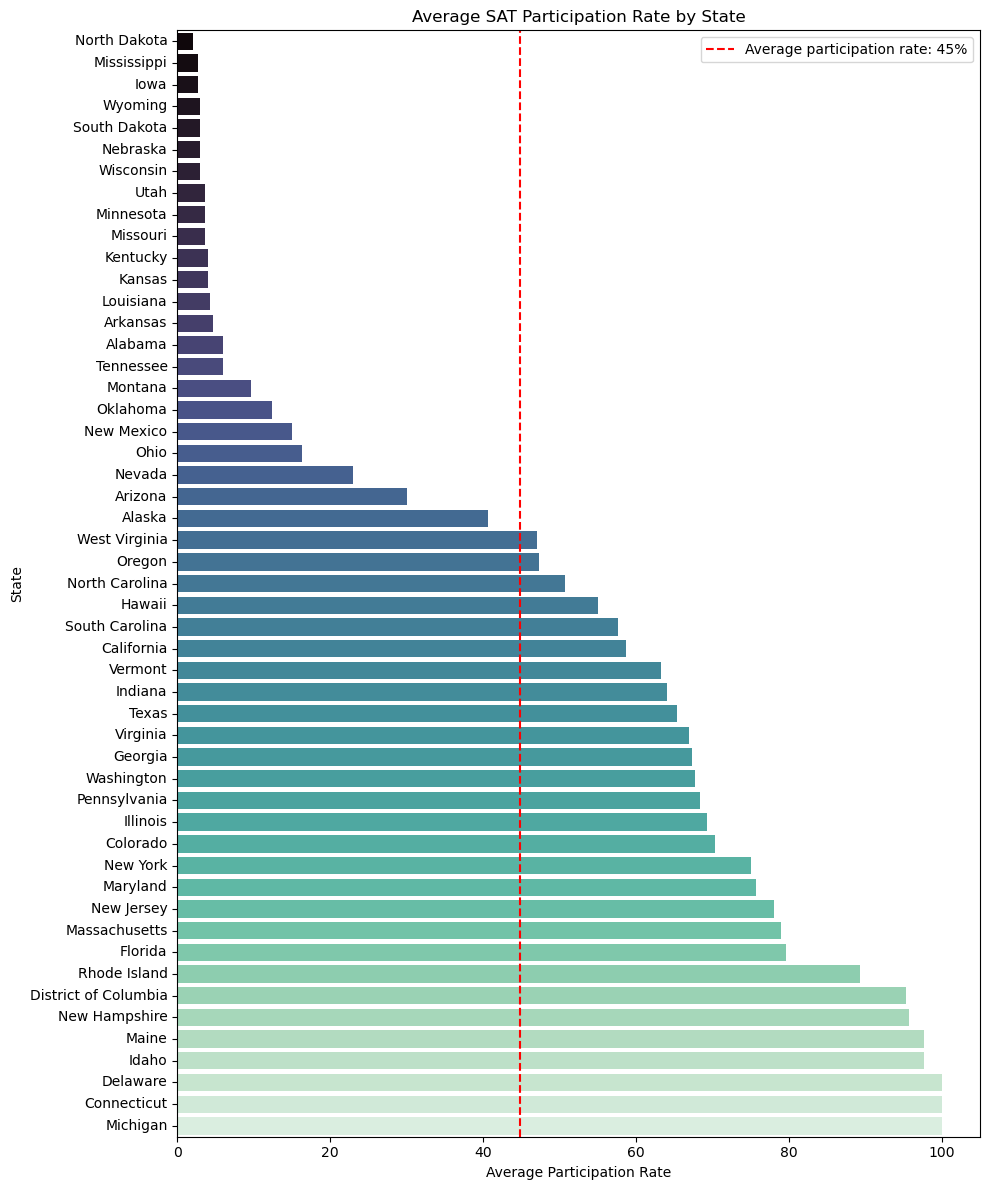

In [30]:
# Plot
plt.figure(figsize=(10, 12))  # Increase height for better spacing
sns.barplot(data=state_participation.sort_values('participation_rate'), 
            x='participation_rate', 
            y='state', 
            hue='state',
            palette='mako')

# Add the mean participation rate as a vertical line
plt.axvline(x=mean_participation_rate, color='red', linestyle='--', label=f'Average participation rate: {mean_participation_rate:.0f}%') #want 'no point'

# Add titles and labels
plt.title('Average SAT Participation Rate by State')
plt.xlabel('Average Participation Rate')
plt.ylabel('State')

# Adjust the spacing of state labels
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[1], va='center')  # Ensure labels are centered
plt.legend()

# Show the plot
plt.grid(False)
plt.tight_layout()  # Adjust layout for spacing
plt.show()

#plt.savefig('images/average_sat_by_state.png', format='png', dpi=300)



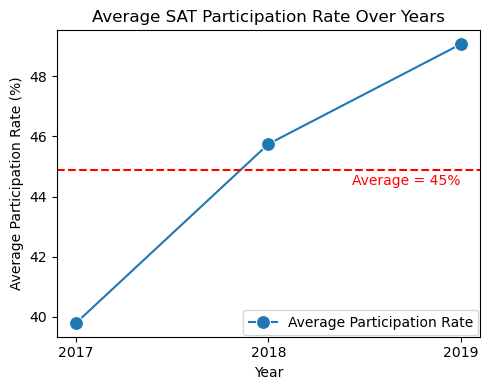

In [41]:
plt.figure(figsize=(5,4))
sns.lineplot(data=yearly_trends, x='year', y='participation_rate', marker='o', markersize=10,  label='Average Participation Rate')

# Add a mean line as a benchmark
plt.axhline(y=mean_participation_rate, color='red', linestyle='--')

# Add a label for the mean line in the bottom-right corner
plt.text(x=yearly_trends['year'].max(), y=mean_participation_rate - 0.5, 
         s='Average = 45%', color='red', ha='right')

# Customize the plot
plt.title('Average SAT Participation Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Participation Rate (%)')
plt.xticks(yearly_trends['year'])
plt.grid(False)

# Move the legend to the bottom-right and ensure it fits in the chart
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), borderaxespad=0.1)

plt.tight_layout()  

plt.show()

#plt.savefig('images/avg_SAT_oveer_year.png', format='png', dpi=300)


In [ ]:
#How many pass 50% 

# Calculate the number of states > 50% and <= 50%
count_above_50 = (state_participation['participation_rate'] > 50).sum()
count_below_equal_50 = (state_participation['participation_rate'] <= 50).sum()

# Conditional filter by value
categories = ['> 50%', '≤ 50%']
counts = [count_above_50, count_below_equal_50]

# SPlotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'])

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Proportion of States Based on Participation Rate')
plt.xlabel('Participation Rate')
plt.ylabel('Number of States')
plt.xticks(rotation=0)  
plt.grid(False)  
plt.tight_layout()


# Display the plot
plt.show()


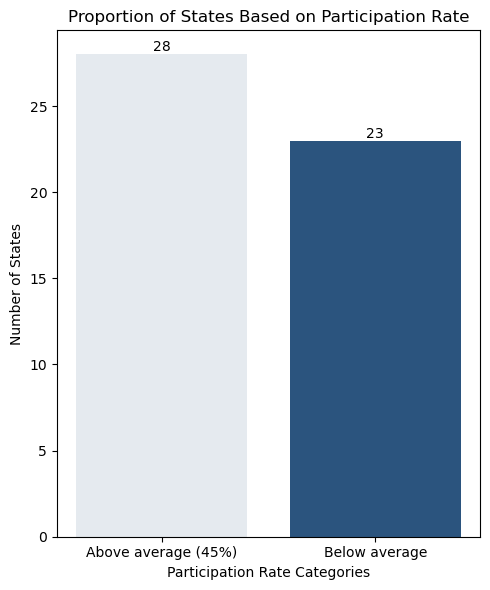

In [43]:
# How many states have a participation rate over the average (45%)

# Calculate the number of states > mean (45%) and <= mean 
count_above_mean = (state_participation['participation_rate'] > 45).sum()
count_below_equal_mean = (state_participation['participation_rate'] <= 45).sum()

# Prepare data for plotting (without DataFrame)
categories_mean = ['Above average (45%)', 'Below average']
counts = [count_above_mean, count_below_equal_mean]

# Plotting the bar chart
plt.figure(figsize=(5, 6))
bars = plt.bar(categories_mean, counts, color=['#E5EAEF', '#2B547E'])

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Proportion of States Based on Participation Rate')
plt.xlabel('Participation Rate Categories')
plt.ylabel('Number of States')
plt.xticks(rotation=0)  
plt.grid(False)  # Disable grid
plt.tight_layout() 

#plt.savefig('images/state_pass_mean.png', format='png', dpi=300)

# Display the plot
plt.show()


In [45]:
# Further investigate the 'Below average'

# Filter states with participation rate <= 45%
below_equal_mean_states = state_participation[state_participation['participation_rate'] <= 45]

# Calculate statistics
mean_below_equal_mean = below_equal_mean_states['participation_rate'].mean()
min_below_equal_mean = below_equal_mean_states['participation_rate'].min()
max_below_equal_mean = below_equal_mean_states['participation_rate'].max()

# Print the results
print(f"Statistics for states with participation rate <= 45%:")
print(f"Mean participation rate: {mean_below_equal_mean:.2f}%")
print(f"Minimum participation rate: {min_below_equal_mean:.2f}%")
print(f"Maximum participation rate: {max_below_equal_mean:.2f}%")

Statistics for states with participation rate <= 45%:
Mean participation rate: 8.97%
Minimum participation rate: 2.00%
Maximum participation rate: 40.67%


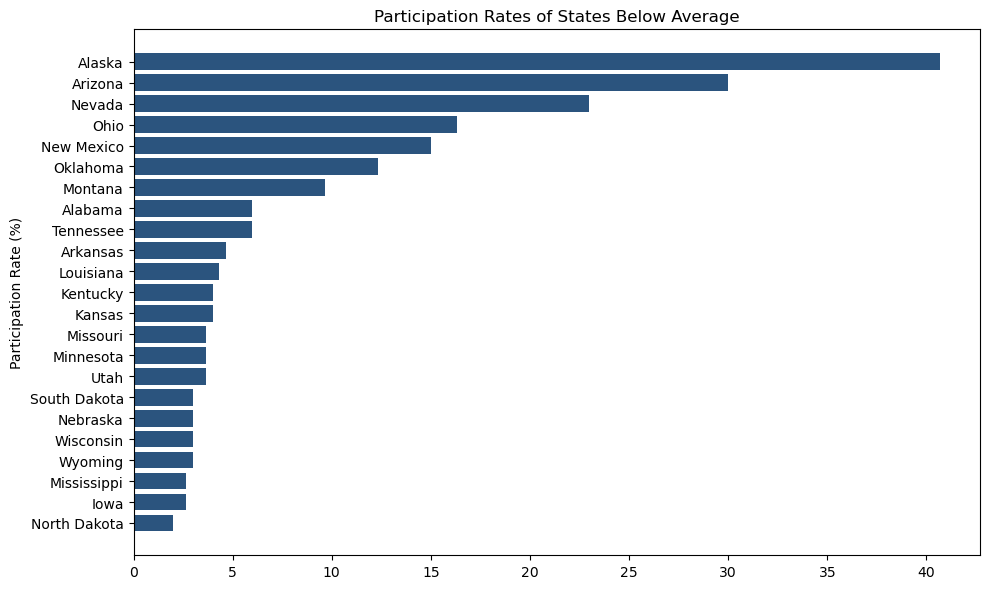

In [47]:
# Further investigate the 'Below average'
# Sort the states with participation rates <= 45%
sorted_below_equal_mean_states = below_equal_mean_states.sort_values(by='participation_rate', ascending=True)

# Plotting the sorted participation rates for states <= 45%
plt.figure(figsize=(10, 6))
plt.barh(sorted_below_equal_mean_states['state'], sorted_below_equal_mean_states['participation_rate'], color='#2B547E')

# Adding titles and labels
plt.title('Participation Rates of States Below Average')
plt.ylabel('Participation Rate (%)')
plt.xticks(rotation=0) 

#plt.savefig('images/not_pass.png',format='png', dpi=600)

plt.tight_layout()
plt.show()


In [49]:
# Get the states with the minimum and maximum participation rates
min_state_not_pass = below_equal_mean_states[below_equal_mean_states['participation_rate'] == min_below_equal_mean]
max_state_not_pass = below_equal_mean_states[below_equal_mean_states['participation_rate'] == max_below_equal_mean]

In [51]:
min_state_not_pass

,state,participation_rate
34,North Dakota,2.0


In [53]:
max_state_not_pass

,state,participation_rate
1,Alaska,40.666667


In [55]:
# Get top 5 lowest participation rates
lowest_participation_states = sat_combined.groupby('state')['participation_rate'].mean().nsmallest(5)
lowest_participation_states

state
North Dakota    2.000000
Iowa            2.666667
Mississippi     2.666667
Nebraska        3.000000
South Dakota    3.000000
Name: participation_rate, dtype: float64

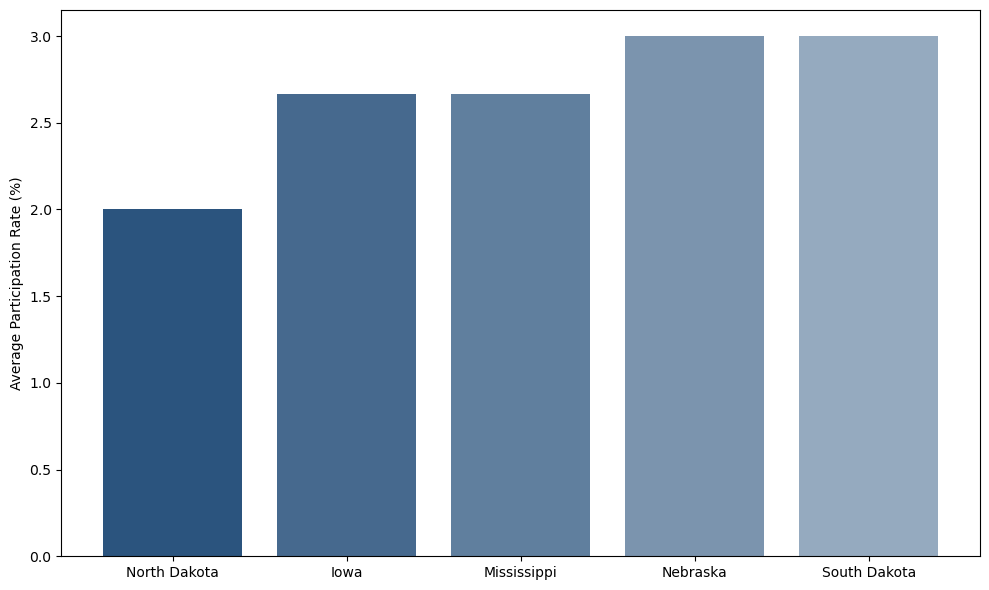

In [57]:

# Plotting the graph for the top 5 lowest participation rates
plt.figure(figsize=(10, 6))
plt.bar(lowest_participation_states.index, lowest_participation_states.values, color=['#2B547E', '#46698e', '#607f9e', '#7b94ae', '#95aabf'])
#plt.title('Top 5 States with Lowest Average SAT Participation Rates')
plt.ylabel('Average Participation Rate (%)')
plt.xticks(rotation=0, ha='center')  # Set rotation to 0 for clarity
plt.tight_layout()

#plt.savefig('images/top5_worse_participation_rate.png', format='png', dpi=300)

# Display the plot
plt.show()


In [61]:
# List out the 100% 

# Filter for states with 100% participation in each year
states_100_percent = sat_combined.groupby('state').filter(
    lambda x: (x['participation_rate'] == 100).all())

# Get unique states that meet the criteria
states_100_percent['state'].unique()


array(['Connecticut', 'Delaware', 'Michigan'], dtype=object)

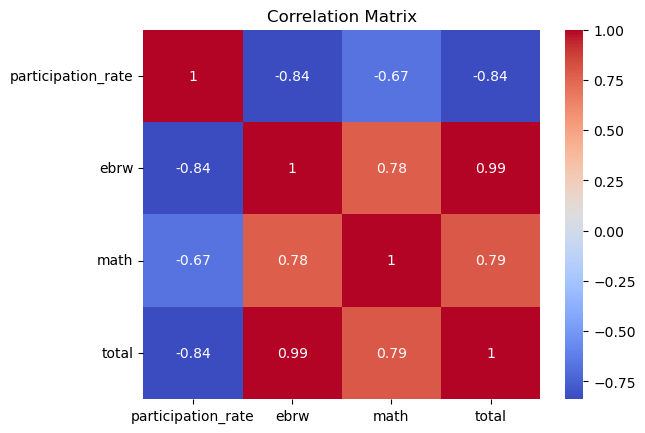

In [63]:
# Correlation analysis
correlation_matrix = sat_combined[['participation_rate', 'ebrw', 'math', 'total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.yticks(rotation=0)

#plt.savefig('images/corre.png',format='png', dpi=300)

plt.show()

Correlation between participation rate and total score: -0.84


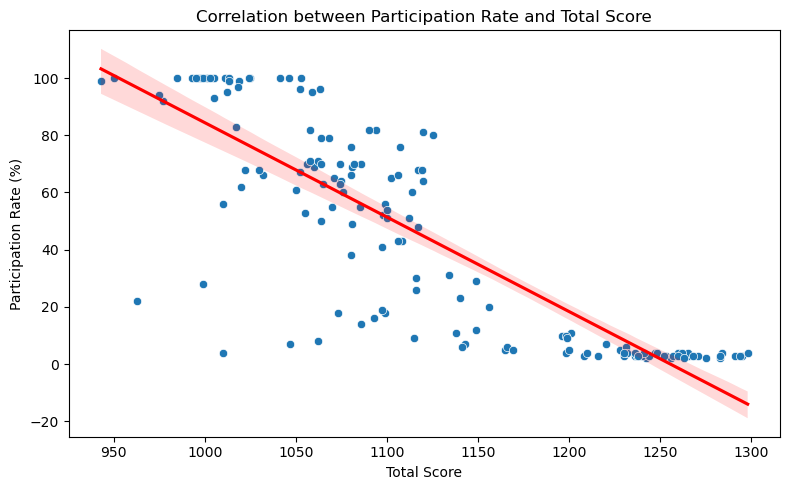

In [65]:
# Calculate the correlation coef.
correlation = sat_combined['participation_rate'].corr(sat_combined['total'])
print(f"Correlation between participation rate and total score: {correlation:.2f}")

# Plot 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sat_combined, x='total', y='participation_rate', marker='o')
sns.regplot(data=sat_combined, x='total', y='participation_rate', scatter=False, color='red')

# Customize the plot
plt.title('Correlation between Participation Rate and Total Score')
plt.xlabel('Total Score')
plt.ylabel('Participation Rate (%)')
plt.grid(False)
plt.tight_layout()

#plt.savefig('images/correlation_rate_score.png', format='png', dpi=300)

# Step 3: Show the plot
plt.show()



#output is -0.84 
#Negative Correlation: The negative sign suggests that as one variable increases, the other tends to decrease. 
#In this case, as the participation rate increases, the total score tends to decrease, and vice versa.

In [67]:
sat_combined.pivot_table(
    index='year',                   # Use 'year' as the index
    values=['participation_rate', 'ebrw', 'math', 'total'],  # Columns to summarize
    aggfunc=['mean', 'std', 'min', 'max']).transpose()  # Aggregation functions

year                            2017         2018         2019
mean ebrw                 569.117647   563.686275   560.803922
     math                 547.627451   556.235294   552.196078
     participation_rate    39.803922    45.745098    49.058824
     total               1126.098039  1120.019608  1113.078431
std  ebrw                  45.666901    47.502627    46.248035
     math                  84.909119    47.772623    51.290553
     participation_rate    35.276632    37.314256    38.747600
     total                 92.494812    94.155083    97.197910
min  ebrw                 482.000000   480.000000   483.000000
     math                  52.000000   480.000000   460.000000
     participation_rate     2.000000     2.000000     2.000000
     total                950.000000   977.000000   943.000000
max  ebrw                 644.000000   643.000000   636.000000
     math                 651.000000   655.000000   648.000000
     participation_rate   100.000000   100.000000   100.000000
     total               1295.000000  1298.000000  1284.000000

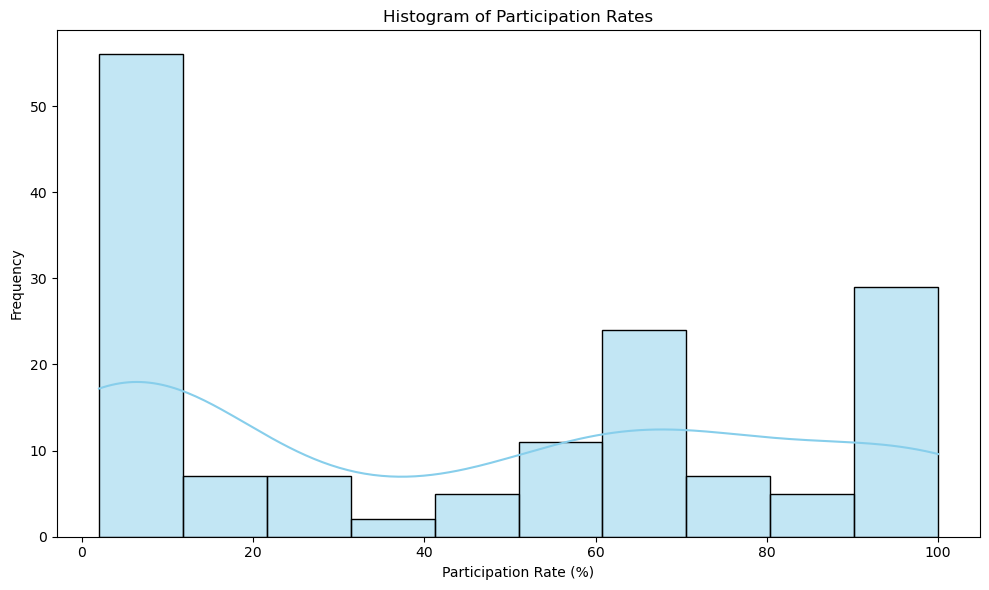

In [69]:
# What is the mean of participation rate (hist) 

#Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sat_combined['participation_rate'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Participation Rates')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
#plt.savefig('images/histogram_sat_participation.png', format='png', dpi=300)
plt.show()


In [77]:
sat_combined['participation_rate'].skew()

0.1699994643718558

In [ ]:
#Any significant change by state

In [79]:
# Pivot the DataFrame to have states as rows and years as columns
pch = sat_combined.pivot(index='state', columns='year', values='participation_rate')

# Calculate the change from 2017 to 2019
pch['change_17_19'] = pch[2019] - pch[2017]

# Calculate the percentage change from 2017 to 2019
pch['pct_change_17_19'] = (pch['change_17_19'] / pch[2017]) * 100

# Reset index to get the 'state' column back
pct_change = pch.reset_index()

# Display the results
print("Participation Rate Changes from 2017 to 2019:")
print(pct_change[['state', 'change_17_19', 'pct_change_17_19']])


Participation Rate Changes from 2017 to 2019:
year                 state  change_17_19  pct_change_17_19
0                  Alabama           2.0         40.000000
1                   Alaska           3.0          7.894737
2                  Arizona           1.0          3.333333
3                 Arkansas           3.0        100.000000
4               California          10.0         18.867925
5                 Colorado          89.0        809.090909
6              Connecticut           0.0          0.000000
7                 Delaware           0.0          0.000000
8     District of Columbia          -6.0         -6.000000
9                  Florida          17.0         20.481928
10                 Georgia          10.0         16.393443
11                  Hawaii          -1.0         -1.818182
12                   Idaho           7.0          7.526882
13                Illinois          91.0       1011.111111
14                 Indiana           3.0          4.761905
15        

In [81]:
# Check data
sat_combined[sat_combined['state'] == 'Oklahoma']

,year,state,participation_rate,ebrw,math,total
36,2017,Oklahoma,7.0,530,517,1047
86,2018,Oklahoma,8.0,541,521,1062
138,2019,Oklahoma,22.0,490,472,963


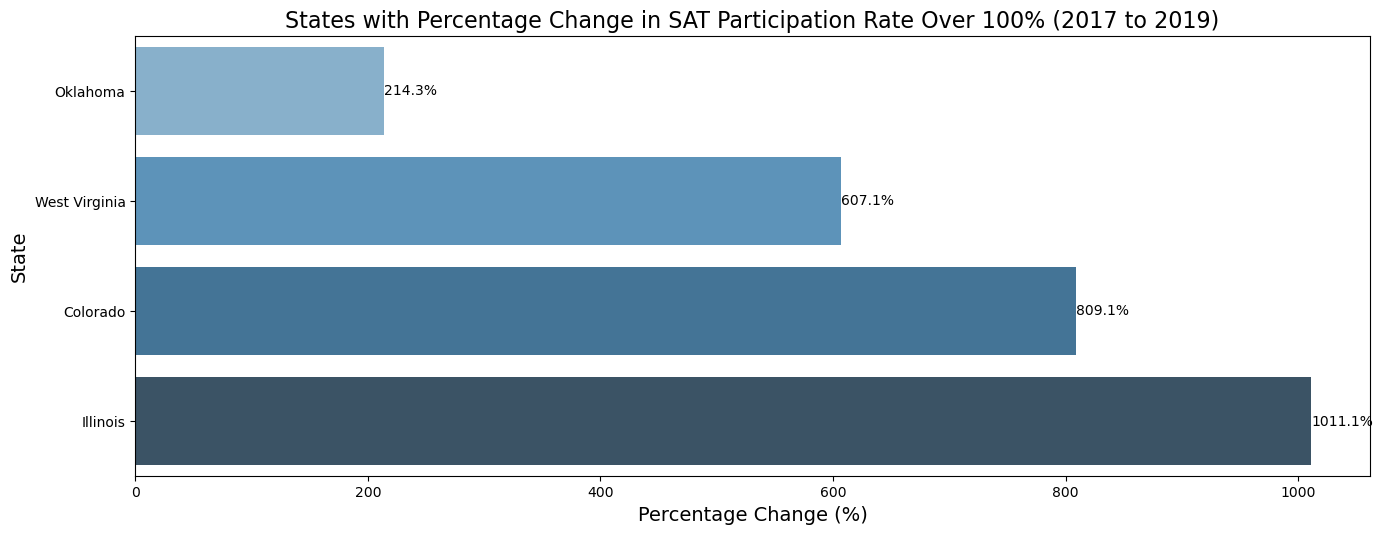

In [99]:
# Filter the DataFrame for percentage changes over 100%
filtered_pct_change = pct_change[pct_change['pct_change_17_19'] > 100]

# Plotting
plt.figure(figsize=(14, 10))

# Sort the filtered DataFrame by percentage change in ascending order
filtered_pct_change.sort_values(by='pct_change_17_19', ascending=True, inplace=True)

# Percentage Change
plt.subplot(2, 1, 2)
ax2 = sns.barplot(data=filtered_pct_change, x='pct_change_17_19', y='state', palette='Blues_d')
plt.title('States with Percentage Change in SAT Participation Rate Over 100% (2017 to 2019)', fontsize=16)
plt.xlabel('Percentage Change (%)', fontsize=14)
plt.ylabel('State', fontsize=14)

# Add data labels
for index, value in enumerate(filtered_pct_change['pct_change_17_19']):
    ax2.text(value, index, f'{value:.1f}%', color='black', va='center')

plt.tight_layout()
plt.show()


In [97]:
# import warnings
#from pandas.errors import SettingWithCopyWarning
#warnings.filterwarnings('ignore', category=SettingWithCopyWarning)

# Additional Import for other insight from ACT

In [101]:
# Read in ACT data...
act_2017 = pd.read_csv('data/act_2017.csv')
act_2018 = pd.read_csv('data/act_2018.csv')
act_2019 = pd.read_csv('data/act_2019.csv')

In [103]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [105]:
act_2018.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [107]:
act_2019.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [109]:
# replace unwanted col. * act_2017 have 2 different col.
act_2017= act_2017[['State', 'Participation', 'Composite']].copy()
act_2017.columns #check

Index(['State', 'Participation', 'Composite'], dtype='object')

In [111]:
# Add a 'Year' column to each DataFrame
act_2017['Year'] = 2017
act_2018['Year'] = 2018
act_2019['Year'] = 2019

#Combine all DataFrames into one
act_combined = pd.concat([act_2017, act_2018, act_2019], ignore_index=True)

# Print the combined DataFrame --> to check the combined file
act_combined.head (5)

,State,Participation,Composite,Year
0,National,60%,21.0,2017
1,Alabama,100%,19.2,2017
2,Alaska,65%,19.8,2017
3,Arizona,62%,19.7,2017
4,Arkansas,100%,19.4,2017


In [113]:
# Remove '%' sign from 'Participation' and convert to numeric in one step
act_combined['Participation'] = pd.to_numeric(act_combined['Participation'].str.replace('%', ''), errors='coerce')

In [115]:
act_combined.columns = act_combined.columns.str.lower() #Finalize cleansing up by make col. in lower
act_combined.columns

Index(['state', 'participation', 'composite', 'year'], dtype='object')

In [117]:
# Check for duplicates in State/Year combinations
act_combined['participation'].nunique() 

64

In [119]:
# Check for duplicates in State/Year combinations
duplicates = act_combined[act_combined.duplicated(subset=['state', 'year'], keep=False)]

if not duplicates.empty:
    print("Warning: Duplicate State/Year combinations found:")
    print(duplicates)
    
    # Optional: Remove duplicates, keeping the first occurrence using the `keep` parameter
    act_combined = act_combined.drop_duplicates(subset=['state', 'year'], keep='first')
    print("Duplicates have been removed, keeping the first occurrence.")
else:
    print("No duplicates found in State/Year combinations.")

    state  participation composite  year
71  Maine              7      24.0  2018
72  Maine              7      24.0  2018
Duplicates have been removed, keeping the first occurrence.


In [121]:
# Check the mean
act_combined['participation'].mean()

61.806451612903224

In [123]:
act_combined = act_combined.rename(columns={'participation': 'participation_rate'}) #rename

In [125]:
act_combined.columns # Check wether it rename

Index(['state', 'participation_rate', 'composite', 'year'], dtype='object')

In [127]:
act_combined['state'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'District of columbia'],
      dtype=object)

In [129]:
#exporting ACT_clean version
act_combined.to_csv('data/act_polished.csv')

In [131]:
# Define the states of interest
focus_states = ['North Dakota', 'Iowa', 'Mississippi', 'Nebraska', 'South Dakota']

# Filter the combined_data for the specified states
filtered_data = act_combined[act_combined['state'].isin(focus_states)]

# Calculate the mean participation rates for each specified state
mean_participation_focus = filtered_data.groupby('state').agg({
    'participation_rate': 'mean',
  
}).reset_index()

# Display the mean participation rates
print(mean_participation_focus)


          state  participation_rate
0          Iowa           67.000000
1   Mississippi          100.000000
2      Nebraska           94.666667
3  North Dakota           97.333333
4  South Dakota           77.333333


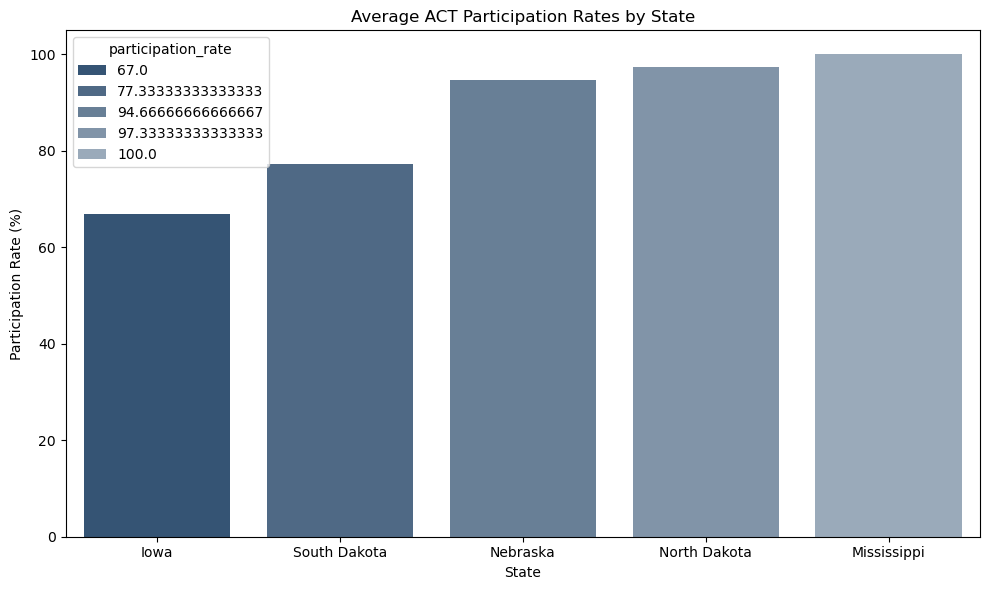

In [133]:
#find out the number of ACT test participation of the focus state

# Sort the DataFrame by participation_rate in ascending order
mean_participation_focus.sort_values(by='participation_rate', ascending=True, inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_participation_focus, x='state', y='participation_rate', hue = 'participation_rate',  palette=['#2B547E', '#46698e', '#607f9e', '#7b94ae', '#95aabf'])

# Customize the plot
plt.title('Average ACT Participation Rates by State')
plt.xlabel('State')
plt.ylabel('Participation Rate (%)')
plt.tight_layout()
plt.grid=False

#plt.savefig('figures/average_act_participation.png', format='png', dpi=300)

# Show the plot
plt.show()
